In [1]:
from sklearn.datasets import fetch_olivetti_faces


In [2]:
face_data = fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\vagundu\scikit_learn_data


In [4]:
!pip install scikit-image

  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)


In [5]:
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
%matplotlib inline

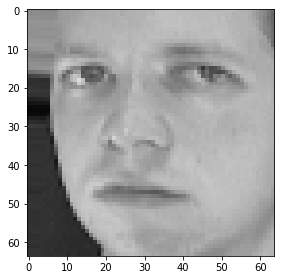

In [18]:
imshow(face_data.images[5])

In [19]:
face_data.target[0]


0

In [20]:
face_data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [21]:
face_data.images.shape


(400, 64, 64)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [23]:
trainX, testX, trainY, testY = train_test_split(face_data.data, face_data.target)


In [25]:
svc = SVC(kernel='rbf')


In [26]:
svc.fit(trainX,trainY)


SVC()

In [27]:
svc.score(testX,testY)


0.81

In [28]:
from sklearn.decomposition import PCA


In [29]:
pca = PCA(n_components=64, whiten=True)


In [30]:
face_data_img = pca.fit_transform(face_data.data)


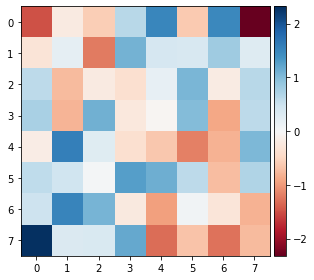

In [31]:
imshow(face_data_img[0].reshape(8,8))


In [32]:
svc = SVC(kernel='rbf')
trainX, testX, trainY, testY = train_test_split(face_data_img, face_data.target)
svc.fit(trainX, trainY)


SVC()

In [33]:
svc.score(testX, testY)


0.93

In [34]:
from sklearn.pipeline import make_pipeline


In [35]:
pipeline = make_pipeline(PCA(n_components=64, whiten=True), SVC(kernel='rbf'))


In [36]:
trainX, testX, trainY, testY = train_test_split(face_data.data, face_data.target)
pipeline.fit(trainX,trainY)

Pipeline(steps=[('pca', PCA(n_components=64, whiten=True)), ('svc', SVC())])

In [37]:
pipeline.score(testX,testY)


0.97

In [38]:
pipeline.predict(testX)


array([21,  2, 25, 20, 11, 15, 18, 37, 12,  3,  0, 16,  5, 20, 29, 39, 35,
       16,  2, 31,  9,  6,  3,  7, 33, 12,  8, 19, 15, 27, 17, 37,  4, 17,
       35,  6, 17, 32, 35, 17, 22, 12, 13,  4, 18, 36,  6,  5, 13, 19, 31,
       21,  9,  6, 12, 24, 37, 22, 16, 18, 10, 34, 37,  7, 30, 33, 30, 36,
       19, 15, 29, 19, 21,  5, 31, 34, 39, 10, 34, 33, 35, 29, 31,  9, 39,
        3, 20, 10, 39,  0,  0, 22, 23, 33,  3, 31, 14, 15, 34, 23])

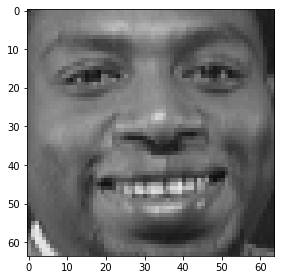

In [39]:
imshow(testX[0].reshape(64,64))


In [40]:
testY[0]


21

In [41]:
res = pipeline.predict(testX)


In [42]:
res21 = testX[res == 21]


In [43]:
res21.shape


(3, 4096)

In [44]:
from joblib import dump, load


saved model to local

In [45]:
dump(pipeline, 'model.pipeline')


['model.pipeline']

In [46]:
load('model.pipeline')

Pipeline(steps=[('pca', PCA(n_components=64, whiten=True)), ('svc', SVC())])